**Limitations of Linear Models**

Linear Models are the most widely used models in Statistics.

But they come with their own limitations.

Not proficient in handling Binary Data

Not Accurate When count data(number of footfalls, number of pages visited etc ..) is involved.

Some variable have a constraint of being only strictly positive

To fix some of these problems we go can go for Transformation.

In some scenarios Transformation minimises interpretability so we have to look for other alternatives.

To overcome the some limitations of Linear Models , we can go for **Generalized Linear Models(GLMs)**.

In GLMs the modeling is done on the scale in which the data was recorded.

GLMs honor the known assumptions of the data

GLMs comprise of 3 components

- Random Component that explains the data distribution that describes Randomness / Errors.

- Systematic Component consists of linear predictors (the covariate and the coefficient)

- Link function connects the mean of the response to Predictors

Types of Generalized Models

- Logistic Regression used for predicting Binary Outcomes.

- Poisson Regression used for predicting count data (# of footfalls, # of hits on a website)

# Logistic Regression

In [2]:
from __future__ import print_function
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

Scores = [(200,1),(100,0),(150,1),(320,1),(270,1),(134,0),(322,1),(140,0),(210,0),(199,0)]
Labels = ['Score','Win']
df = pd.DataFrame.from_records(Scores, columns=Labels)
glm_binom = sm.GLM(df.Win, df.Score, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    Win   No. Observations:                   10
Model:                            GLM   Df Residuals:                        9
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.6858
Date:                Sun, 20 Nov 2022   Deviance:                       13.372
Time:                        07:16:46   Pearson chi2:                     9.94
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Score          0.0021      0.003      0.688      0.4

The value of the score coef tells us how it is able to tell us to what extent it is able to predict the likilihood of winning a game .

The rest of the values are a standard outcome of a regression equation.

In [3]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep = 2.0, random_state=101)

In [4]:
X

array([[-1.04910781,  2.85665467],
       [-0.95081668, -2.92962994],
       [-1.41723589, -2.39627051],
       [-2.92377584, -1.5567371 ],
       [-2.41728707,  1.4951089 ],
       [-3.40154264, -1.14982839],
       [-1.53659935, -2.28580115],
       [-1.96406213,  1.8664572 ],
       [-2.19070633,  1.65164572],
       [-1.31680513,  2.50444458],
       [-1.79105894,  2.26372183],
       [-2.28561844, -1.81814172],
       [-2.10327634, -2.04648481],
       [-1.18806127, -2.56253522],
       [-1.23117577, -2.43168205],
       [-1.99030787,  2.11046883],
       [-0.7761225 ,  3.36618615],
       [-2.87909083,  1.30763322],
       [-2.26359432,  1.67342039],
       [-0.69672613, -2.88672306],
       [-1.53984553,  2.86891725],
       [-2.87361456, -1.27402704],
       [-1.97189546, -1.93060566],
       [-1.92003663,  2.31224241],
       [-2.01864042, -1.89207083],
       [-1.97024612, -1.95093269],
       [-1.54635501, -2.66437846],
       [-1.44273586, -2.48626113],
       [-2.48450598,

In [5]:
y

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

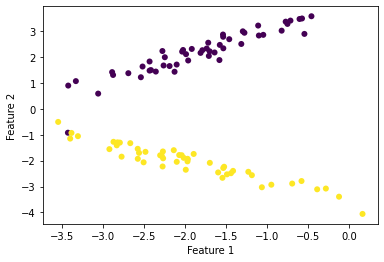

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            linewidth=0, edgecolor=None)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float),test_size=0.33, random_state=101)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)
print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Precision = TP/(TP + FP)

Precision is similar to accuracy but looks at only the positively predicted data.

Recall = TP / (TP + FN)

Recall is also similar to accuracy, it looks at only the relevant data.

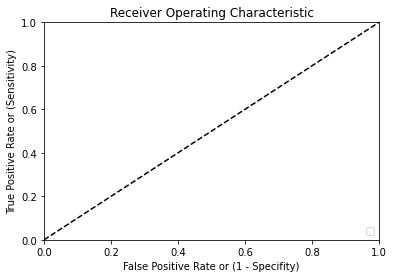

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_clf)
# roc_auc = auc(y_test, y_clf)
# Plot ROC curve
#plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_clf)


array([[14,  1],
       [ 0, 18]])

Accuracy for this model is (14+18) / (14+1+0+18) = 0.96969

Sensitivity for the model is 100%

Specificity for the model is 94%

Based on the numbers we can interpret that the model is able to clearly separate the data into 2 classes.

The model is also able to designate the individual numbers that do not belong to a specific class as negative.

# Poisson's Regression

One of the underlying assumptions of Linear Regression is that the error terms follow a normal distribution

When the error terms do not follow normal distribution , we go for other types of Regression

When we try to model count data(number of footfalls, traffic in a website), we go for Poisson Regression

**Where is Poisson Regression Used ?**

Poisson Regression is used to model count data

Number of foot falls , number of call drops etc ...

In mathematical terms , Poisson Regression is used to model the logarithm of the count data

**Variables in Poisson Regression Equation**

Dependent Variable Y represents count or sometimes Y/t is used signifying the rate

Independent variables are categorical or continuous variables depending on the dataset

Link Function : g(μ)=β0+β1x1+β2x2+…+βkxk = xTiβ

Random component: Response Y has a Poisson distribution that is yi∼Poisson(μi) for i=1,...,N where the expected count of yi is E(Y)=μ.

Systematic component: Any set of X = (X1, X2, … Xk) are independent variables.

**Link Function**

Identity link: μ=β0+β1x1
In some ocassions the identity link function is used in Poisson regression. Here the random component is the Poisson distribution.

Natural log link: log(μ)=β0+β1x1
The Poisson regression model for counts is occassionally referred to as a “Poisson loglinear model”.

For simplicity, with a single dependent variable, we can write: log(μ)=α+βx. This is equivalent to:μ=exp(α+βx)=exp(α)exp(βx)

**Interpreting Parameters**

Interpreting the estimated parameter.

exp(α) = effect on the mean of Y, that is mean, when X = 0

exp(β) = with every unit increase in X, the predictor variable has **multiplicative effect **of exp(β) on the mean of Y, that is μ

If β = 0, then exp(β) = 1, and the expected count, μ = E(y) = exp(α), and Y and X are not related.

If β > 0, then exp(β) > 1, and the expected count μ = E(y) is exp(β) times larger than when X = 0

If β < 0, then exp(β) < 1, and the expected count μ = E(y) is exp(β) times smaller than when X = 0

**Poisson Regression for Rate**

The set of equations mentioned in the above cards can also be applicable for rate data. Y/t

Y is the count data and t is the time

In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [18]:
dataset = pd.DataFrame({'A':np.random.rand(100)*1000, 

                        'B':np.random.rand(100)*100,  

                        'C':np.random.rand(100)*10, 

                        'target':np.random.randint(0, 5, 100)})


The variables are random numbers.

The Dependent variable signifies count data.

The Independent variables are random numbers.

In [19]:
X = dataset[['A','B','C']]
X['constant'] = 1
y = dataset['target']
size = 1e5
nbeta = 3

In [20]:
fam = sm.families.Poisson()
pois_glm = sm.GLM(y,X, family=fam)
pois_res = pois_glm.fit()
pois_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -172.91
Date:                Sun, 20 Nov 2022   Deviance:                       128.89
Time:                        07:42:18   Pearson chi2:                     98.9
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
A             -0.0002      0.000     -0.685      0.493      -0.001       0.000
B             -0.0048      0.002     -2.029      0.042      -0.009      -0.000
C              0.0413      0.025      1.662      0.097      -0.007       0.090
constant       0.7906      0.205      3.851      0.000       0.388       1.193
==============================================================================
"""

On viewing the results and the coefficient values, we can say to what extent each coef is explaining the log of count data i.e the dependent variable.

The rest of the values are what a Regression Output shows.

# Advanced Models

**Bayesian Vs Linear Regression**

Bayesian Regression is similar to Linear Regression in many ways

In Linear Regression the output is number / value

In Bayesian the output is also a value but it also returns the entire probability distribution

How is the Probability Distribution constructed?

Here, the predicted value is returned and the variance value is also returned.

With value as the mean and the variance value as the standard deviation the probability distribution can be constructed

In [25]:
from sklearn import linear_model
regr = linear_model.BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, 
              copy_X=True, fit_intercept=True, lambda_1=1e-06, 
              lambda_2=1e-06, n_iter=300, normalize=False, 
              tol=0.001, verbose=False)
regr.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


BayesianRidge(normalize=False)

Pro

It is Robust to Gaussian Noise

Works well if the number of features and observations in the dataset are comparable

Cons

It is really time-consuming

**CART Algorithm**

Classification and Regression Trees are a set of non-linear learning algorithms which can be used for numerical as well as categorical features

Here the tree has a set of nodes that split the branch into children

In turn each of the branches can go into another node or just stay as a leaf along with the forecasted value or the predicted class

**Why Trees?**

Performing the prediction task is quick

The principal task is traversal along the the tree from the root node to the leaf nodes and at each point check if the respective feature is above or below the threshold

The concept of variance reduction is used in this algorithm

In each of the given nodes a search is performed along all the features across all levels in that feature

The combination that contains the best variance is marked and selected as the best

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
regr = DecisionTreeRegressor(random_state=101)
regr.fit(X_train, y_train)

mean_absolute_error(y_test, regr.predict(X_test))

0.030303030303030304

Pro ...

Trees are the go to algorithms for modeling non-linear behavior

They can be used for both categorical and numeric datatypes without performing any kind of normalization

The training time , Prediction time are fast

They leave a very small memory fingerprint

Cons

It belongs to a class of Greedy Algorithms , does not optimize the entire solution , it just optimizes specific choices

If there are significant number of features, it does not perform well

The leaf nodes can be very specific sometime leading to overfitting. In that case those nodes can be pruned.

**Bagging and Boosting**

Bagging and Boosting are techniques that are used for combining multiple models to improve overall accuracy.

The final combination is a non linear model containing a set of linear models.

Bootstrap Aggregation is abbreviated as Bagging.

The main objective of this technique is to reduce the overall variance by aggregating the models.


**How is Bagging Done ?**

Each model is trained on the selected set of features with replacement

At the end of training , during prediction , each of the models perform their respective prediction , the results are all taken , averaged and then the ensemble prediction is performed.

Bagging Tip

The training and the prediction happens at individual model level. This gives flexibility to parallelize the operation on multiple CPUs.

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
bagging = BaggingRegressor(SGDRegressor(), n_jobs=-1,
                           n_estimators=1000, random_state=101,
                           max_features=0.8)
bagging.fit(X_train, y_train)
mean_absolute_error(y_test, bagging.predict(X_test))

0.2726262762456697

In [29]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, 
                             n_jobs=-1, random_state=101)
regr.fit(X_train, y_train)
mean_absolute_error(y_test, regr.predict(X_test))

0.03090909090909091

**Boosting**

Boosting is another way of combining multiple learning models

The objective of boosting is to reduce the prediction bias

In boosting the models are in a sequence , cascaded with each other , the output of one is the input of another

**Boosting Algorithm**

During training , the output of one model is predicted

The error is calculated based on the actual value

This error is multiplied with the learning rate

New model is trained on that error set and inserted at final stage of the cascaded and trained models

The output value from one stage is the value predicted combined with the learning rate times by the output prediction from the current stage

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor(n_estimators=500, 

                                 learning_rate=0.01, 

                                 random_state=101)

regr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,
                          random_state=101)

Pros and Cons
Pros

We can build very good and robust models combining weak models

They support stochastic learning

The robustness in the solution is created by the stochastic or random nature of the model

Cons

Time taken for training is very high . There is a high memory footprint

The steps in model building can be tricky because of the stochastic nature

# Example

Some of the application areas of above models include

- Prediction Problems

- Binary and Multi Class Classification

- Time Series Analysis

- Ranking Problems


Consider a dataset from the Music Industry.

The descriptors of a particular song are given and the year the song was produced is given.

Can this data be modeled as a Regression Problem to predict the year given the descriptors ? yes we can predict the year of production based on the descriptors .

- The features should be identified based on the relevance to the context

- Once the features are extracted a model can be trained with Features as inputs and year of production as output

- The model can be evaluated using Mean Absolute Error between actual and predicted values

- The ultimate objective would be to minimize the error

Classfiication

- The previous problem can also be modeled as a Multi Class Classification problem.

- The features and the descriptors still remain the same.

- The output will belong to one of the classes from the range of years provided.

- Mean absolute error can be used for validating the accuracy of the prediction.

Ranking Problems

- Consider a dataset with some features related to a car along with a price.

- Insurance companies would want to assess if the car is riskier or not to sell / buy on a given scale.

- How do you think you will design this problem ?

- The above problem can be modeled as a regression problem where we are predicting the risk on a scale .

- The methodology to asses the prediction will be different .

- In this scenario , we can go for label ranking loss , a metric that indicates the strength ranking

- Mean Absolute and Mean Standard Errors are not applicable in this scenario.

- Another way to measure the prediction accuracy is by Label Ranking Average Precision.

Time Series

 - So far you have seen problems where the features and the target variables are different.

 - In scenario where you try to analysis stock prices or currency fluctuations or Support ticket trend over a period of time the variables themselves can be the features and the targets .

 - These problems fall under Time Series Analysis.

 - In time series analysis , the data at time t+k can be the target and data at time t can be the feature. The concept of auto regression is applied in these scenarios.